In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from copy import deepcopy
from math import inf


In [2]:
#PROBLEM 1
print("Problem 1")


Problem 1


In [3]:
def euclidean_distance(X, Y):
    return np.linalg.norm(X-Y)

In [4]:
import random
def kmeans(data,k):
    random.seed(10)
    #Set random clusters
    C_x = np.random.randint(0, np.max(data), size=k)
    C_y = np.random.randint(0, np.max(data), size=k)
    C = np.array(list(zip(C_x, C_y)), dtype=np.float64)
    
    # Store old centroids 
    C_old = np.zeros(C.shape)
    
    clusters=[]
    for i in range(k):
        clusters.append([])
    
    # Distance between new centroids and old centroids
    distance = euclidean_distance(C, C_old)
    #temp to store the cluster number
    temp = np.zeros(len(data)).astype(int)
    iterations = 0
    while (distance > 0):
        clusters.clear()
        for i in range(k):
            clusters.append([])

        iterations+=1
        #check distance from each data to the Centroids
        for i in range(len(data)):
            minDist = inf
            for j in range(k):

                dist = euclidean_distance(data[i], C[j])
                if (dist < minDist):
                    minDist = dist
                    temp[i] = j

                    
        #putting data into clusters
        for i in range(len(data)):
            clusters[temp[i]].append(data[i])
            
        # Storing the old centroids
        C_old = deepcopy(C)
        
        # Finding the new centroids by taking the average value
        for i in range(k):
            C[i] = np.mean(clusters[i], axis=0)
            if (np.isnan(C[i]).any()):
                C[i] = np.zeros(C[i].shape)
        
        C=np.around(C,decimals=2)
        distance = euclidean_distance(C,C_old)
        if (np.isnan(euclidean_distance(C,C_old))):
            break
    print("Iterations:",iterations)
    return C,clusters

In [5]:
k = 3
print("Importing Cluster_data.csv...")
cluster_data = pd.read_csv("cluster_data.csv")
cluster_data.head()


Importing Cluster_data.csv...


,1,0.0000000,0.0000000.1
0,2,0.1,-0.1
1,3,0.2,-0.2
2,4,0.3,-0.3
3,5,0.4,-0.4
4,6,0.5,-0.5


799


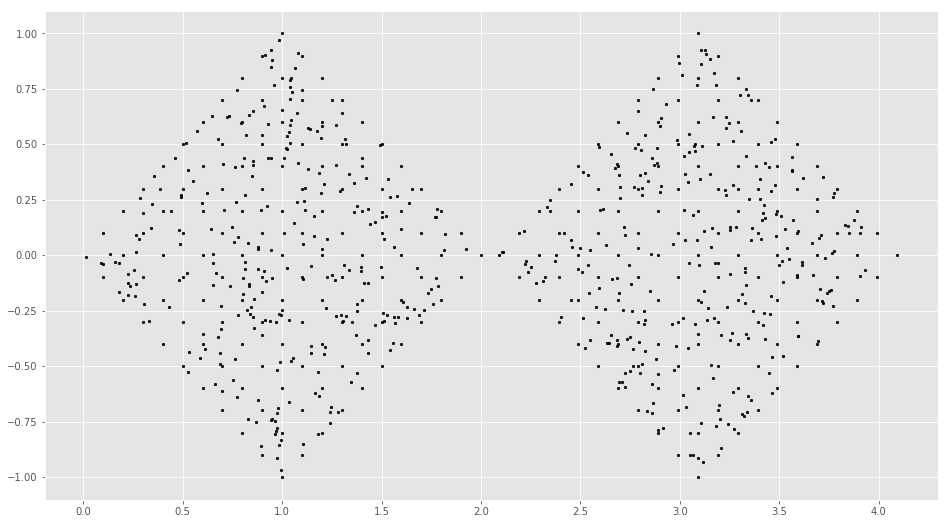

In [6]:
plt.rcParams['figure.figsize'] = (16, 9)
plt.style.use('ggplot')

# Getting the values and plotting it
f1 = cluster_data['0.0000000']
f2 = cluster_data['0.0000000.1']
X = np.array(list(zip(f1, f2)))
plt.scatter(f1, f2, c='black', s=7)
print(len(X))


In [7]:
C, clusters = kmeans(X,k)

Iterations: 6


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


length of cluster 1 : 210
length of cluster 2 : 193
length of cluster 3 : 396
The data clusters around the chosen centroids


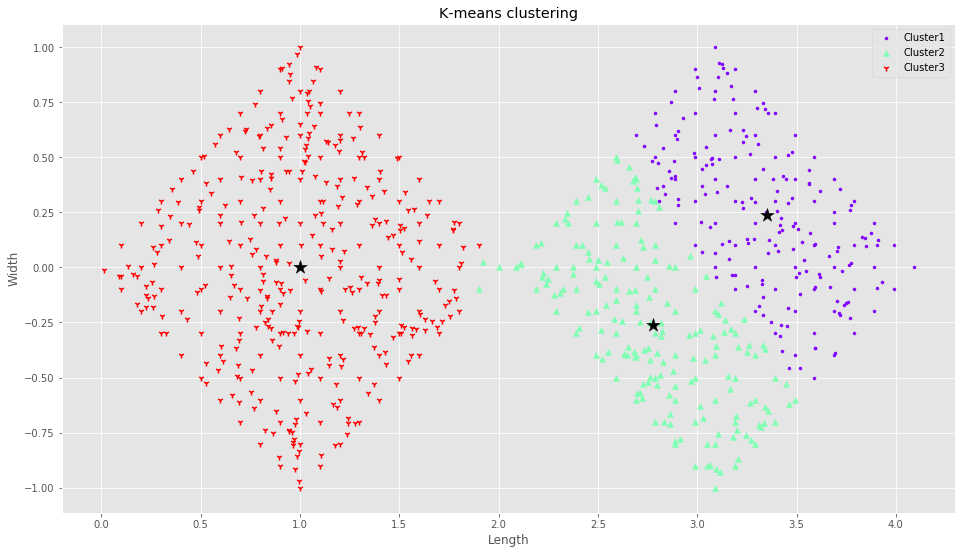

In [8]:
import matplotlib.cm as cm

colors = cm.rainbow(np.linspace(0, 1, k))
markers = ['.','^','1','8','s','p','P']
for j in range(len(clusters)):
    clusters[j]=np.array(clusters[j])
    print("length of cluster",j+1,":",len(clusters[j]))
    plt.scatter(clusters[j][:,0],clusters[j][:,1],c=colors[j],marker=markers[j],label="Cluster"+str(j+1))
            
plt.scatter(C[:, 0], C[:, 1], marker='*', s=200, c='#050505')
plt.title('K-means clustering')
plt.xlabel('Length')
plt.ylabel('Width')
plt.legend()
plt.show
print("The data clusters around the chosen centroids")

In [9]:
#PROBLEM 2
print("Problem 2")

Problem 2


In [10]:
def sigmoid(z):
    sig = float(1.0)/(1+np.exp(-z))
    return sig

def h(w,X):
    return sigmoid(X.dot(w))

def RegLogReg(w,X,y,lamda):
    m = len(X)
    return -1/m*(y.dot(np.log(h(w,X))))+(1-y).dot(np.log(1-h))+lamda/(2*m)*np.sum(w**2)

def RegGradient(w,X,y,lamda,alpha):
    m = len(X)
    reg = float(lamda)*w/m
    #print("reg",reg)
    grad = alpha*(h(w,X)-y).T.dot(X)
    return grad+reg

def prediction(w,X):
    return np.round(h(w,X))

In [11]:
def f_measure(test,pred):
    tp=0
    tn=0
    fp=0
    fn=0
    for i in range(len(test)):
        if pred[i] == test[i] and test[i] == 1:
            tp+=1
        elif pred[i] == test[i] and test[i] == 0:
            tn+=1
        elif pred[i] != test[i] and test[i] == 0:
            fp+=1
        elif pred[i] != test[i] and test[i] == 1:
            fn+=1
    if (tp+fp == 0):
        pre = 0
    else:
        pre=tp/(tp+fp)
    
    if (tp+fn == 0):
        rec = 0
    else:
        rec=tp/(tp+fn)
    if pre+rec == 0:
        fmeasure = 0
    else:
        fmeasure=(2*pre*rec)/(pre+rec)
    return fmeasure

In [12]:
print("Importing chronic_kidney_disease_full.csv...")
print("Data has been processing using Weka, changed from Nominal to Binary")

kidneydata = pd.read_csv("chronic_kidney_disease_full4.csv")
kidneydata=kidneydata.replace({'ckd':1,'notckd':0})
kidneydata = kidneydata.iloc[np.random.permutation(len(kidneydata))]
kidneydata.head(799)

Importing chronic_kidney_disease_full.csv...
Data has been processing using Weka, changed from Nominal to Binary


,age,bp,sg=1.005,sg=1.010,sg=1.015,sg=1.020,sg=1.025,al=0,al=1,al=2,...,pcv,wbcc,rbcc,htn=no,dm=no,cad=no,appet=poor,pe=no,ane=no,class
108,45.000000,80.0,0.00000,0.00000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,37.000000,10200.000000,4.200000,1.0,1.0,1.0,0.0,1.0,1.0,1
232,50.000000,90.0,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,38.884498,8406.122449,4.707435,1.0,1.0,1.0,0.0,0.0,1.0,1
194,80.000000,70.0,0.00000,1.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,38.884498,8406.122449,4.707435,0.0,0.0,1.0,0.0,1.0,1.0,1
95,62.000000,90.0,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,38.884498,8406.122449,4.707435,0.0,1.0,1.0,0.0,0.0,0.0,1
82,38.000000,70.0,0.01983,0.23796,0.212465,0.300283,0.229462,0.562147,0.124294,0.121469,...,38.884498,8406.122449,4.707435,0.0,1.0,1.0,1.0,0.0,1.0,1
168,65.000000,70.0,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,39.000000,6700.000000,4.707435,0.0,0.0,1.0,0.0,1.0,1.0,1
8,52.000000,100.0,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,33.000000,9600.000000,4.000000,0.0,0.0,1.0,0.0,1.0,0.0,1
139,41.000000,70.0,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,33.000000,8406.122449,4.707435,0.0,1.0,1.0,0.0,0.0,0.0,1
94,65.000000,70.0,0.00000,1.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,36.000000,11900.000000,3.900000,1.0,0.0,1.0,0.0,1.0,1.0,1
355,23.000000,60.0,0.00000,0.00000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,...,52.000000,6300.000000,4.600000,1.0,1.0,1.0,0.0,1.0,1.0,0


In [13]:
train, test = np.split(kidneydata, [int(.8*len(kidneydata))])
x_train = train.iloc[:,0:-1].values
y_train = train.iloc[:,-1].values
x_test = test.iloc[:,0:-1].values
y_test = test.iloc[:,-1].values
ws =  np.zeros(x_train.shape[1])
fm=[]
for i in np.arange(-2,4,0.2):
    for  j in range(100):
    #update weights
        ws = ws-RegGradient(ws, x_train, y_train,i,0.1)
    pred=prediction(ws,x_test)
    fm.append(f_measure(y_test,pred))


c:\users\jessi\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Plotting...


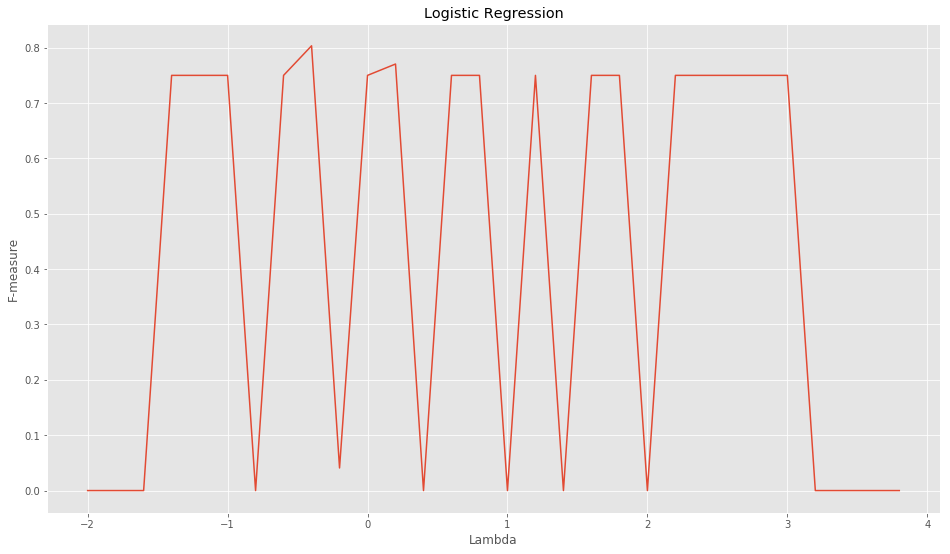

In [14]:
import matplotlib.pyplot as plt
print("Plotting...")
plt.title('Logistic Regression')
plt.plot(np.arange(-2,4,0.2),fm)
plt.xlabel('Lambda')
plt.ylabel('F-measure')
plt.show()

In [15]:
from sklearn.metrics import accuracy_score
print("Accuracy score:",accuracy_score(y_test,pred))


Accuracy score: 0.4


In [16]:
#Standardization
print("Using Standardization...")
kidneydata=(kidneydata-np.mean(kidneydata))/np.std(kidneydata)
kidneydata.head(400)

Using Standardization...


,age,bp,sg=1.005,sg=1.010,sg=1.015,sg=1.020,sg=1.025,al=0,al=1,al=2,...,pcv,wbcc,rbcc,htn=no,dm=no,cad=no,appet=poor,pe=no,ane=no,class
108,-3.824158e-01,0.262338,-1.514096e-01,-5.948481e-01,2.049436e+00,-6.973440e-01,-5.808992e-01,9.381400e-01,-4.004736e-01,-3.952596e-01,...,-2.314857e-01,7.118381e-01,-6.046195e-01,0.767203,0.726321,0.306392,-0.509238,0.485679,0.42123,0.774597
232,-8.749553e-02,1.005311,-1.514096e-01,-5.948481e-01,2.049436e+00,-6.973440e-01,-5.808992e-01,-1.204451e+00,2.821518e+00,-3.952596e-01,...,-4.852051e-08,5.957761e-12,4.468204e-08,0.767203,0.726321,0.306392,-0.509238,-2.064135,0.42123,0.774597
194,1.682026e+00,-0.480635,-1.514096e-01,1.904931e+00,-5.529056e-01,-6.973440e-01,-5.808992e-01,-1.204451e+00,-4.004736e-01,2.858738e+00,...,-4.852051e-08,5.957761e-12,4.468204e-08,-1.309986,-1.383721,0.306392,-0.509238,0.485679,0.42123,0.774597
95,6.203131e-01,1.005311,-1.514096e-01,-5.948481e-01,2.049436e+00,-6.973440e-01,-5.808992e-01,-1.204451e+00,2.821518e+00,-3.952596e-01,...,-4.852051e-08,5.957761e-12,4.468204e-08,-1.309986,0.726321,0.306392,-0.509238,-2.064135,-2.37995,0.774597
82,-7.953042e-01,-0.480635,-1.908843e-07,-7.499336e-07,9.433489e-07,-5.863775e-07,5.442881e-07,2.035461e-07,6.121785e-07,2.115098e-07,...,-4.852051e-08,5.957761e-12,4.468204e-08,-1.309986,0.726321,0.306392,1.968640,-2.064135,0.42123,0.774597
168,7.972653e-01,-0.480635,-1.514096e-01,-5.948481e-01,2.049436e+00,-6.973440e-01,-5.808992e-01,-1.204451e+00,-4.004736e-01,-3.952596e-01,...,1.418784e-02,-6.770155e-01,4.468204e-08,-1.309986,-1.383721,0.306392,-0.509238,0.485679,0.42123,0.774597
8,3.047258e-02,1.748284,-1.514096e-01,-5.948481e-01,2.049436e+00,-6.973440e-01,-5.808992e-01,-1.204451e+00,-4.004736e-01,-3.952596e-01,...,-7.228327e-01,4.737489e-01,-8.429238e-01,-1.309986,-1.383721,0.306392,-0.509238,0.485679,-2.37995,0.774597
139,-6.183520e-01,-0.480635,-1.514096e-01,-5.948481e-01,2.049436e+00,-6.973440e-01,-5.808992e-01,-1.204451e+00,-4.004736e-01,2.858738e+00,...,-7.228327e-01,5.957761e-12,4.468204e-08,-1.309986,0.726321,0.306392,-0.509238,-2.064135,-2.37995,0.774597
94,7.972653e-01,-0.480635,-1.514096e-01,1.904931e+00,-5.529056e-01,-6.973440e-01,-5.808992e-01,9.381400e-01,-4.004736e-01,-3.952596e-01,...,-3.543224e-01,1.386424e+00,-9.620759e-01,0.767203,-1.383721,0.306392,-0.509238,0.485679,0.42123,0.774597
355,-1.680065e+00,-1.223607,-1.514096e-01,-5.948481e-01,-5.529056e-01,1.624943e+00,-5.808992e-01,9.381400e-01,-4.004736e-01,-3.952596e-01,...,1.611066e+00,-8.357417e-01,-1.280110e-01,0.767203,0.726321,0.306392,-0.509238,0.485679,0.42123,-1.290994


In [17]:
train, test = np.split(kidneydata, [int(.8*len(kidneydata))])
x_train = train.iloc[:,0:-1].values
y_train = train.iloc[:,-1].values
x_test = test.iloc[:,0:-1].values
y_test = test.iloc[:,-1].values
ws =  np.zeros(x_train.shape[1])
fm=[]
for i in np.arange(-2,4,0.2):
    for  j in range(100):
    #update weights
        ws = ws-RegGradient(ws, x_train, y_train,i,0.1)
    pred=prediction(ws,x_test)
    fm.append(f_measure(y_test,pred))

c:\users\jessi\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  


Plotting...


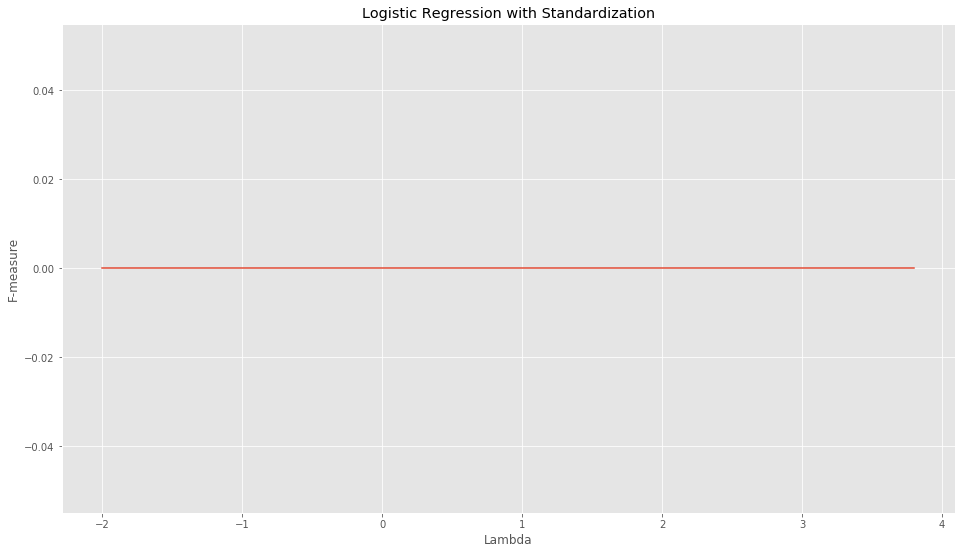

In [18]:
print("Plotting...")

plt.plot(np.arange(-2,4,0.2),fm)
plt.title('Logistic Regression with Standardization')
plt.xlabel('Lambda')
plt.ylabel('F-measure')
plt.show()

In [19]:
print("Accuracy score:",accuracy_score(np.round(y_test),pred))


Accuracy score: 0.5


In [20]:
#PROBLEM 3
print("Problem 3")


Problem 3


In [21]:
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import AffinityPropagation
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split
from sklearn import manifold, datasets


In [22]:
print("Loading digits...")
digits = load_digits()
targets = digits.target
data = digits.data
k = 10
print(digits.data.shape)
print("data length:",len(data))
print("targets:",targets)

Loading digits...
(1797, 64)
data length: 1797
targets: [0 1 2 ... 8 9 8]


<Figure size 1152x648 with 0 Axes>

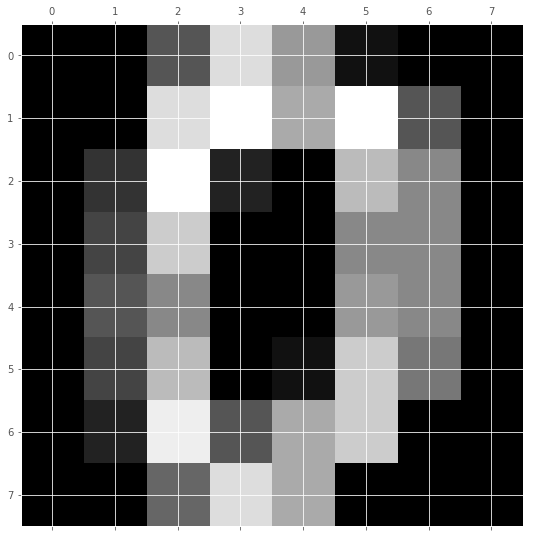

In [23]:
import matplotlib.pyplot as plt 
plt.gray() 
plt.matshow(digits.images[0]) 

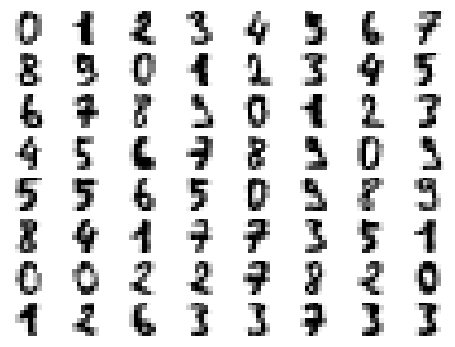

In [24]:
fig = plt.figure(figsize=(8, 6))

for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(digits.images[i], cmap=plt.cm.binary, interpolation='nearest')

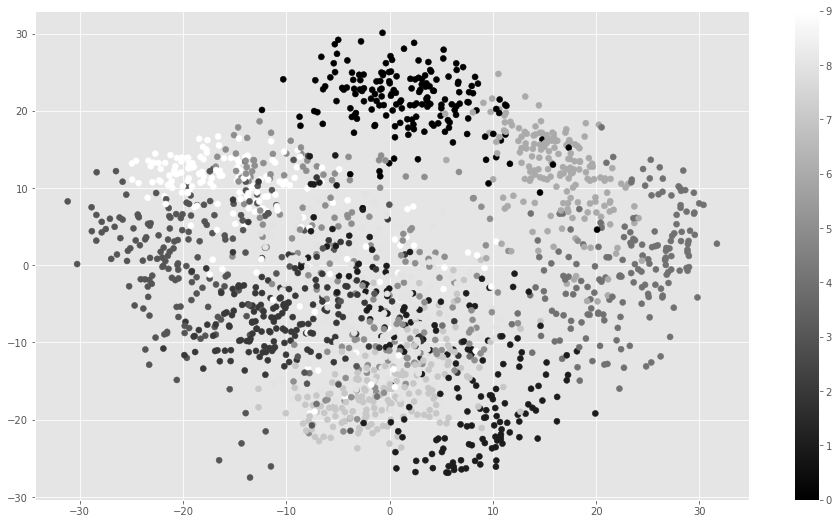

In [25]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
proj = pca.fit_transform(data)
plt.scatter(proj[:, 0], proj[:, 1], c=digits.target) 

plt.colorbar() 
X = np.array(list(zip(proj[:, 0], proj[:, 1])))


In [26]:
print("Performing Kmeans clustering...")
k=10
C,clusters = kmeans(X,k)

Performing Kmeans clustering...


c:\users\jessi\appdata\local\programs\python\python36\lib\site-packages\numpy\core\fromnumeric.py:2920: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
c:\users\jessi\appdata\local\programs\python\python36\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


Iterations: 28


In [27]:
labels = []
for i in range(len(X)):
    for j in range(len(clusters)):
        if(X[i] in np.array(clusters[j])):
            labels.append(j)
print("K means labels:",labels)

K means labels: [4, 6, 6, 7, 2, 9, 2, 3, 8, 9, 5, 6, 8, 7, 2, 3, 1, 6, 3, 9, 4, 8, 0, 0, 2, 8, 2, 8, 8, 9, 4, 9, 8, 3, 2, 3, 4, 9, 3, 7, 3, 2, 8, 6, 3, 7, 6, 8, 4, 4, 8, 8, 6, 8, 1, 5, 8, 6, 2, 0, 7, 6, 7, 0, 2, 5, 2, 5, 1, 3, 6, 8, 4, 7, 8, 8, 6, 6, 4, 4, 3, 3, 2, 0, 8, 6, 8, 1, 2, 7, 6, 0, 7, 6, 3, 1, 8, 2, 0, 6, 2, 4, 8, 3, 2, 7, 1, 8, 6, 8, 1, 2, 6, 3, 6, 8, 8, 3, 3, 9, 8, 1, 3, 3, 2, 0, 4, 8, 9, 6, 4, 9, 0, 0, 1, 3, 5, 3, 8, 7, 4, 8, 0, 7, 1, 3, 5, 6, 8, 7, 4, 8, 0, 0, 1, 8, 2, 6, 6, 7, 4, 9, 3, 6, 5, 8, 4, 9, 8, 7, 6, 1, 8, 3, 3, 0, 8, 8, 4, 5, 0, 3, 3, 8, 8, 5, 8, 8, 5, 7, 0, 6, 7, 0, 1, 2, 5, 5, 1, 9, 6, 3, 4, 9, 8, 3, 3, 3, 5, 5, 8, 3, 5, 0, 3, 8, 6, 0, 8, 0, 9, 6, 3, 2, 8, 1, 0, 6, 1, 4, 3, 0, 5, 9, 4, 6, 3, 6, 1, 1, 6, 8, 6, 8, 3, 6, 6, 1, 8, 8, 1, 9, 4, 8, 9, 8, 4, 6, 0, 7, 1, 9, 5, 3, 9, 0, 4, 6, 0, 0, 2, 3, 5, 3, 8, 3, 4, 6, 0, 7, 2, 9, 5, 6, 8, 7, 4, 7, 9, 9, 5, 9, 4, 9, 8, 7, 8, 2, 6, 3, 3, 7, 9, 6, 4, 4, 0, 0, 3, 9, 0, 4, 6, 0, 4, 0, 0, 6, 7, 0, 2, 5, 5, 5, 2, 3, 6, 8,

In [28]:
print("Performing Agglomerative clustering with Ward linkage...")

ward = AgglomerativeClustering(affinity='euclidean', compute_full_tree='auto',
            connectivity=None, linkage='ward', memory=None, n_clusters=k,
            pooling_func='deprecated').fit(data)
ward_labels = ward.labels_
print("Ward Labels:",ward.labels_)


Performing Agglomerative clustering with Ward linkage...
Ward Labels: [7 9 4 ... 4 1 4]


In [29]:
print("Performing Affinity Propagation...")
af=AffinityPropagation().fit(data)
af_labels =af.labels_
print("Number of clusters: ",len(af.cluster_centers_indices_))
print("Affinity Propagation Labels:",af_labels)

Performing Affinity Propagation...
Number of clusters:  103
Affinity Propagation Labels: [ 76  66   2 ... 101  17  13]


In [30]:
from sklearn.metrics import confusion_matrix,fowlkes_mallows_score
def con_matrix(clusters,method,n_clusters):
    indices=[]

    for j in range(n_clusters):
        indices.append([i for i, x in enumerate(clusters) if x == j])
    
    #for every cluster, find the "major" Digit   
    present_digit=[np.argmax(np.bincount(np.array(digits.target)[x])) for i,x in enumerate(indices)]
    
    predictions=np.repeat(-1,digits.target.shape)
    for i,x in enumerate(indices):
        for j,y in enumerate(x):
            predictions[y]=present_digit[i]
    cm=confusion_matrix(digits.target,predictions)
    for i,x in enumerate(list(set(digits.target)-set(predictions))):
        cm[:,x]=np.repeat(-1,10)

    accuracy = fowlkes_mallows_score(digits.target,predictions) 
    print(method,"Method")
    print("Confusion Matrix:")
    print(cm)
    print("Fowlkes Mallows Score (accuracy): ", accuracy)
    print("")
 

In [ ]:
con_matrix(labels,"K-means",k)
con_matrix(ward_labels,"Agglomerative Clustering with Ward",k)
con_matrix(af_labels,"Affinity Propagation",len(af.cluster_centers_indices_))


In [ ]:
#PROBLEM 4
print("Problem 4")


In [ ]:
from sklearn.svm import SVC
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier

In [ ]:
print("Loading Chronic Kidney Disease Data...")
kidneydata = pd.read_csv("chronic_kidney_disease_full4.csv")
kidneydata=kidneydata.replace({'ckd':1,'notckd':0})
kidneydata.head()




In [ ]:
X = kidneydata.iloc[:,0:-1].values
#target
y = kidneydata.iloc[:,-1].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
linear = SVC(kernel='linear').fit(X_train,y_train)
predictions= linear.predict(X_test)
fm = f1_score(y_test,predictions)
print("Linear SVM f-measure: ",fm)

In [ ]:
rbf = SVC(kernel='rbf',gamma='auto').fit(X_train,y_train)
predictions= rbf.predict(X_test)
fm = f1_score(y_test,predictions)
print("RBF SVM f-measure: ",fm)

In [ ]:
forest = RandomForestClassifier().fit(X_train,y_train)
predictions= forest.predict(X_test)
fm = f1_score(y_test,predictions)
print("Random Forest Classifier f-measure: ",fm)